# 1. 다운로드 ( install part )

In [1]:
!pip install mediapipe opencv-python

In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

In [5]:
## VIDEO FEED 실시간 비디오 재생 
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    cv2.imshow('Mediapipe Feed', frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [26]:
'''
필요한 음성 라이브러리 다운 
!pip uninstall playsound
!pip install playsound==1.2.2

from gtts import gTTS #google Text to Speach
from playsound import playsound #playsound 모듈로부터 playsound 불러오기
import os # os 라이브러리 불러오기
'''

# 2 . 인식단계 ( Make Detections )

In [5]:
## VIDEO FEED 실시간 비디오 재생 
## Setup mediapipe instance
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    ## 웹카메라 인식 못함 -> 구체적, 정확적 min_tracking_confidence 높임
    ## min_detection_confidence 너무 높은 값은 정확한 값만 탐지하기에 원하는 결과를 얻기 힘들수 있음
    
    while cap.isOpened():
        ret, frame = cap.read()  ## frame = 카메라 
        
        # 사진 수정 및 편집은 RGB 상태에서 가능
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False ## 데이터 효율성
    
        # 포즈 기입( 생성 )

        results = pose.process(image)
    
        # cv2는 BGR이 호환되기에 다시 변환
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) ## OPEN

        # 화면에 찍어주는 부분
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # print(results)
        cv2.imshow('Mediapipe Feed', image) # 생성되는 창 이름, 창에 띄울 변수 = image
    
        if cv2.waitKey(10) & 0xFF == ord('q'):  # q를 입력하면 카메라 출력 종료
            break

    cap.release()
    cv2.destroyAllWindows()

In [17]:
## 변수를 넣기 위해서 함수안에 들어가야 되는 매개변수가 무엇인지 파악
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Union[List[Tuple[int, int]], NoneType] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
   

In [30]:
## 현재 파일 디렉토리 확인 코드
%cd

C:\Users\kimji


# ** Pose Landmarks (참고)

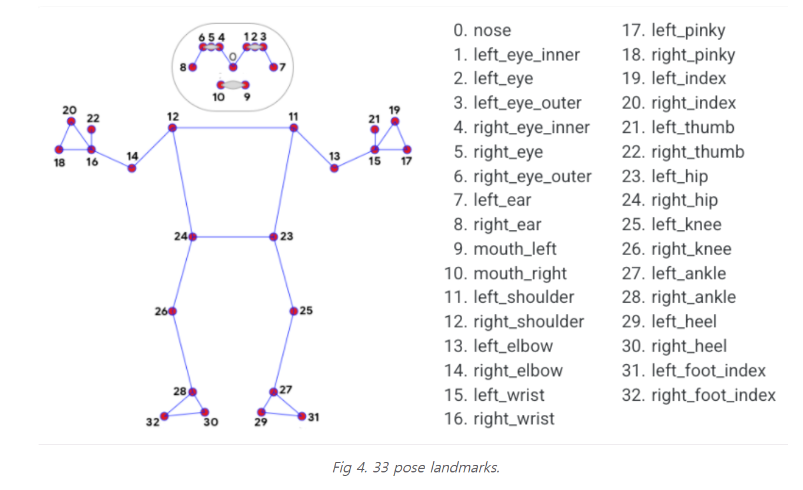

In [39]:
# 기본 포즈 구현을 위해서 관절 번호 추출 부분
image_path = 'mediapipe/pose_landmarks.png'
Image(image_path)

In [8]:
## VIDEO FEED 실시간 비디오 재생 
## Setup mediapipe instance
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    ## 웹카메라 인식 못함 -> 구체적, 정확적 min_tracking_confidence 높임
    ## min_detection_confidence 너무 높은 값은 정확한 값만 탐지하기에 원하는 결과를 얻기 힘들수 있
    
    while cap.isOpened():
        ret, frame = cap.read()  ## frame = 카메라 
    
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False ## 데이터 효율성
    
        results = pose.process(image)
    
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) ## OPEN

        # 랜드마크 추출부분
        try: 
            landmarks = results.pose_landmarks.landmark
            print(landmarks)
        except:
            pass
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # print(results)
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            
            break
    cap.release()
    cv2.destroyAllWindows()

[x: 0.23058876395225525
y: 0.6028918027877808
z: -0.6902279853820801
visibility: 0.9990690350532532
, x: 0.27145302295684814
y: 0.5181444883346558
z: -0.7591150403022766
visibility: 0.9988802075386047
, x: 0.2953673005104065
y: 0.5175971984863281
z: -0.7590222358703613
visibility: 0.9991292357444763
, x: 0.3212429881095886
y: 0.5172560214996338
z: -0.7596153616905212
visibility: 0.9990919828414917
, x: 0.23239755630493164
y: 0.5100250244140625
z: -0.6391268968582153
visibility: 0.9987431168556213
, x: 0.22386574745178223
y: 0.5039119720458984
z: -0.6379088163375854
visibility: 0.9985552430152893
, x: 0.215521901845932
y: 0.4984743893146515
z: -0.6382476091384888
visibility: 0.9981817007064819
, x: 0.4012638032436371
y: 0.5392420291900635
z: -0.7473412156105042
visibility: 0.9996211528778076
, x: 0.25876960158348083
y: 0.5156512260437012
z: -0.18147775530815125
visibility: 0.9988728165626526
, x: 0.27136972546577454
y: 0.6694034337997437
z: -0.6642922759056091
visibility: 0.999630808830

In [9]:
## 카메라를 통해 인식되어지는 부분 감지, 변수로 추출
landmarks

[x: 0.2390473335981369
y: 0.5696695446968079
z: -0.7125521898269653
visibility: 0.9986208081245422
, x: 0.27439025044441223
y: 0.49437257647514343
z: -0.7521539926528931
visibility: 0.9979791045188904
, x: 0.2988596558570862
y: 0.4883788228034973
z: -0.7522852420806885
visibility: 0.9985267519950867
, x: 0.3281433880329132
y: 0.4829297661781311
z: -0.7527812123298645
visibility: 0.9983150362968445
, x: 0.22339308261871338
y: 0.50021892786026
z: -0.6553963422775269
visibility: 0.99786776304245
, x: 0.20790043473243713
y: 0.49978330731391907
z: -0.6544468998908997
visibility: 0.9979591965675354
, x: 0.1937868446111679
y: 0.49879854917526245
z: -0.6547890901565552
visibility: 0.9973810315132141
, x: 0.4041883051395416
y: 0.5003322958946228
z: -0.685001015663147
visibility: 0.9992153644561768
, x: 0.21738488972187042
y: 0.5100802183151245
z: -0.21808978915214539
visibility: 0.9981473088264465
, x: 0.28110677003860474
y: 0.6382061839103699
z: -0.6695789098739624
visibility: 0.99912863969802

In [10]:
# 포즈 구분되어지는 변수값들 확인, 위에 이미지 추출 부분에서 확인된 것과 같음
for Indmrk in mp_pose.PoseLandmark:
    print(Indmrk)


PoseLandmark.NOSE
PoseLandmark.LEFT_EYE_INNER
PoseLandmark.LEFT_EYE
PoseLandmark.LEFT_EYE_OUTER
PoseLandmark.RIGHT_EYE_INNER
PoseLandmark.RIGHT_EYE
PoseLandmark.RIGHT_EYE_OUTER
PoseLandmark.LEFT_EAR
PoseLandmark.RIGHT_EAR
PoseLandmark.MOUTH_LEFT
PoseLandmark.MOUTH_RIGHT
PoseLandmark.LEFT_SHOULDER
PoseLandmark.RIGHT_SHOULDER
PoseLandmark.LEFT_ELBOW
PoseLandmark.RIGHT_ELBOW
PoseLandmark.LEFT_WRIST
PoseLandmark.RIGHT_WRIST
PoseLandmark.LEFT_PINKY
PoseLandmark.RIGHT_PINKY
PoseLandmark.LEFT_INDEX
PoseLandmark.RIGHT_INDEX
PoseLandmark.LEFT_THUMB
PoseLandmark.RIGHT_THUMB
PoseLandmark.LEFT_HIP
PoseLandmark.RIGHT_HIP
PoseLandmark.LEFT_KNEE
PoseLandmark.RIGHT_KNEE
PoseLandmark.LEFT_ANKLE
PoseLandmark.RIGHT_ANKLE
PoseLandmark.LEFT_HEEL
PoseLandmark.RIGHT_HEEL
PoseLandmark.LEFT_FOOT_INDEX
PoseLandmark.RIGHT_FOOT_INDEX


In [13]:
## 오른쪽 팔꿈치가 인식되어지는지 확인할 수 있는 코드, 인식안되면 이 부분 에러나니 카메라 실행 부분 재실행
landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]

x: 0.0995590016245842
y: 1.5932903289794922
z: -0.13860012590885162
visibility: 0.012689127586781979

In [14]:
# 주어진 포즈 관절 번호에 따라 오른쪽 팔꿈치는 16이라는 번호가 할당되어 있음
mp_pose.PoseLandmark.RIGHT_WRIST.value

16

# 3. 각도 계산 ( Calculate Angles )

In [2]:
# 기본 각도 계산 코드.. 
def calculate_angle(a,b,c):
    a = np.array(a) # 시작
    b = np.array(b) # 중간
    c = np.array(c) # 끝
    
    ## 2차원으로 변형 x,y 만 ---[0],[1]
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle > 180.0:
        angle = 360- angle

    return angle
    

In [11]:
# 변수 생성 
## -> 찍혀서 저장되어진 landmarks에서 필요한 부분 추출해서 집어넣어줌
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]                                                                  

In [ ]:
# 변수 생성 
## -> 찍혀서 저장되어진 landmarks에서 필요한 부분 추출해서 집어넣어줌
hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]                                                           

In [21]:
# 생성한 변수값들이 잘 들어가 있는지 확인,  x,y만 집어넣은 이유는 
## 각도계산에 쓰이는 변수만 필요해서
shoulder, elbow, wrist

([0.6035637855529785, 0.883785605430603],
 [0.699359118938446, 1.332258701324463],
 [0.6426216959953308, 1.6700278520584106])

In [42]:
# 생성한 변수값들이 잘 들어가 있는지 확인,  x,y만 집어넣은 이유는 
## 각도계산에 쓰이는 변수만 필요해서
hip, shoulder, elbow

([0.5094362497329712, 1.706925630569458],
 [0.6035637855529785, 0.883785605430603],
 [0.699359118938446, 1.332258701324463])

In [22]:
calculate_angle(shoulder, elbow, wrist) # 각도 계산

158.40728113928867

In [43]:
calculate_angle(hip, shoulder, elbow) # 각도 계산

18.580907784396462

In [47]:
 tuple(np.multiply(elbow, [640,480]).astype(int))

(445, 642)

In [9]:
## VIDEO FEED 실시간 비디오 재생 
## Setup mediapipe instance
cap = cv2.VideoCapture(0)
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    ## 웹카메라 인식 못함 -> 구체적, 정확적 min_tracking_confidence 높임
    ## min_detection_confidence 너무 높은 값은 정확한 값만 탐지하기에 원하는 결과를 얻기 힘들수 있
    
    while cap.isOpened():
        ret, frame = cap.read()  ## frame = 카메라 
    
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False ## 데이터 효율성
    
        results = pose.process(image)
    
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) ## OPEN

        try: 
            landmarks = results.pose_landmarks.landmark

            # 계산하고 싶은 관절 3개 변수 생성
            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]  
            
            # 원하는 각도 계산
            angle = calculate_angle(shoulder, elbow, wrist)

            # 계산된 각도 화면에 표시
            cv2.putText(image, str(angle),
                            tuple(np.multiply(elbow, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )
                        
            # print(landmarks)
        except:
            pass
    
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # print(results)
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
    cap.release()
    cv2.destroyAllWindows()

# 4.  이두운동 

In [ ]:
# 기본 각도 계산 코드.. 
def calculate_angle(a,b,c):
    a = np.array(a) # 시작
    b = np.array(b) # 중간
    c = np.array(c) # 끝
    
    ## 2차원으로 변형 x,y 만 ---[0],[1]
    
    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)

    if angle > 180.0:
        angle = 360- angle

    return angle
    

###  1. 허리 뒤로 졉혀지는 자세

In [ ]:
# 변수 생성 
## 12,24,26
right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
right_knee = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]                                                           

In [ ]:
# 변수 생성 
## 11,23,25
left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
left_knee = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT _KNEE.value].y]                                                           

In [ ]:
if angle > 160: 
    stage = "down" ### TTS 사용 ### 
if angle < 45 and stage =="down": 
    stage ="up" ### TTS 사용 ### 
    counter +=1 
    print(counter) 


###  2. 반동이 심한 경우

###  3. 손목이 심하게 꺽이는 경우

In [47]:
## VIDEO FEED 실시간 비디오 재생 
## Setup mediapipe instance 

### TTS 사용 ### 

cap = cv2.VideoCapture(0) 

counter = 0 
stage = None 

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    ## 웹카메라 인식 못함 -> 구체적, 정확적 min_tracking_confidence 높임
    ## min_detection_confidence 너무 높은 값은 정확한 값만 탐지하기에 원하는 결과를 얻기 힘들수 있다 
    
    while cap.isOpened():
        ret, frame = cap.read()  ## frame = 카메라 
        
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) 
        image.flags.writeable = False ## 데이터 효율성 
     
        results = pose.process(image) 
 
        image.flags.writeable = True  
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) ## OPEN 
 
        try: 
            landmarks = results.pose_landmarks.landmark

            shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]  
            
            angle = calculate_angle(shoulder, elbow, wrist)

            #Visualize angle
            cv2.putText(image, str(angle),
                            tuple(np.multiply(elbow, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )
            # 이두 컬 탐지 코드
            if angle > 160:
                stage = "down" ### TTS 사용 ###
            if angle < 45 and stage =="down":
                stage ="up" ### TTS 사용 ###
                counter +=1
                print(counter)
    
                """
                     # Counter 
            if left_angle > 160:
                left_flag = 'down'
            if left_angle < 50 and left_flag=='down':
                left_count += 1
                left_flag = 'up'

            if right_angle > 160:
                right_flag = 'down'
            if right_angle < 50 and right_flag=='down':
                right_count += 1
                right_flag = 'up'
                """

            '''
            if angle 범위 다치는 각도 :
                ### TTS 사용 ###
                cv로 올바른 자세 사진 띄우기
            '''   
                        
            # print(landmarks)
        except:
            pass

        # 컬 화면애 표시 
        # 스테이스 박스 생성
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)

        # Rep data
        cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                     (10,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

        # Stage data
        cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                     (60,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # print(results)
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

1
2


In [ ]:
mp_drawing.plot_landmarks(results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

##  1) 팔굽

###  1. 목 과도하게 들어간 경우
###  2. 허리가 꺽인 경우
###  3. 손바닥을 가슴 옆이 아닌 어깨에 두고 팔굼치 바깥쪽으로 벌리는 동작

In [42]:
## VIDEO FEED 실시간 비디오 재생 
## Setup mediapipe instance

### TTS 사용 ###

cap = cv2.VideoCapture(0)

counter = 0
stage = None

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    ## 웹카메라 인식 못함 -> 구체적, 정확적 min_tracking_confidence 높임
    ## min_detection_confidence 너무 높은 값은 정확한 값만 탐지하기에 원하는 결과를 얻기 힘들수 있
    
    while cap.isOpened():
        ret, frame = cap.read()  ## frame = 카메라 
        
        # 편집을 위해 조정 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False ## 데이터 효율성
    
        # 표시
        results = pose.process(image)
    
        # cv2를 위해 재조정 BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) ## OPEN

        # Landmarks 표시
        try: 
            landmarks = results.pose_landmarks.landmark

            # left_arm
            shoulder_left = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value].y]
            elbow_left = [landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value].y]
            wrist_left = [landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value].y]  
            
            # Right_arm
            shoulder_right = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value].y]
            elbow_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value].y]
            wrist_right = [landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value].y]  
            
            # angleQ 계산 
            angle_left = calculate_angle(shoulder_left, elbow_left, wrist_left)
            angle_right = calculate_angle(shoulder_right, elbow_right, wrist_right)
            

            # 각도 가시화
            cv2.putText(image, str(angle_left),
                            tuple(np.multiply(elbow_left, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )

            cv2.putText(image, str(angle_right),
                            tuple(np.multiply(elbow_right, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )
            # 팔굽 로직
            if angle_left < 110 and angle_right < 110 :
                stage = "down" ### TTS 사용 ###
            if angle_left > 160 and angle_right > 160 and stage =="down":
                stage ="up" ### TTS 사용 ###
                counter +=1
                print(counter)
            '''
            if angle 범위 다치는 각도 :
                ### TTS 사용 ###
                cv로 올바른 자세 사진 띄우기
            '''   
                        
            # print(landmarks)
        except:
            pass

        
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)

        # Rep data
        cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                     (10,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

        # Stage data
        cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                     (60,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # cv2 가시화
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # print(results)
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

1
2
3
4


## 2) 스쿼트

In [44]:
## VIDEO FEED 실시간 비디오 재생 
## Setup mediapipe instance

### TTS 사용 ###

cap = cv2.VideoCapture(0)

counter = 0
stage = None

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    ## 웹카메라 인식 못함 -> 구체적, 정확적 min_tracking_confidence 높임
    ## min_detection_confidence 너무 높은 값은 정확한 값만 탐지하기에 원하는 결과를 얻기 힘들수 있
    
    while cap.isOpened():
        ret, frame = cap.read()  ## frame = 카메라 
        
        # RGB 변환
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False ## 데이터 효율성
    
        # detection
        results = pose.process(image)
    
        # BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) ## OPEN

        # Landmarks
        try: 
            landmarks = results.pose_landmarks.landmark

            #left_leg
            hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]  
            
            #Right_leg
            hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            ankle_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]  
            
            #angle
            angle_left = calculate_angle(hip_left, knee_left, ankle_left)
            angle_right = calculate_angle(hip_right, knee_right, ankle_right)
            

            # 가시화 angle
            cv2.putText(image, str(angle_left),
                            tuple(np.multiply(elbow_left, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )

            cv2.putText(image, str(angle_right),
                            tuple(np.multiply(elbow_right, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )
            # 스쿼트 로직
            if angle_left < 110 and angle_right < 110 :
                stage = "down" ### TTS 사용 ###
            if angle_left > 160 and angle_right > 160 and stage =="down":
                stage ="up" ### TTS 사용 ###
                counter +=1
                print(counter)

            '''
            if angle 범위 다치는 각도 :
                ### TTS 사용 ###
                cv로 올바른 자세 사진 띄우기
            '''   
                        
            # print(landmarks)
        except:
            pass

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)

        # Rep data
        cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                     (10,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

        # Stage data
        cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                     (60,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        # detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # print(results)
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

1
2
3
4
5
6
7


## 3대 운동 --> 집에서 이용하는 스마트미러 취지에 안 맞음
### 홈트 종목들중에서 모델을 통한 구체화

## 3 데드리프트-미완

In [ ]:
## VIDEO FEED 실시간 비디오 재생 
## Setup mediapipe instance

### TTS 사용 ###

cap = cv2.VideoCapture(0)

counter = 0
stage = None

with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    ## 웹카메라 인식 못함 -> 구체적, 정확적 min_tracking_confidence 높임
    ## min_detection_confidence 너무 높은 값은 정확한 값만 탐지하기에 원하는 결과를 얻기 힘들수 있
    
    while cap.isOpened():
        ret, frame = cap.read()  ## frame = 카메라 
        
        # RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False ## 데이터 효율성
    
        #detection
        results = pose.process(image)
    
        # BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) ## OPEN

        # Landmarks 추출
        try: 
            landmarks = results.pose_landmarks.landmark

            #left_leg
            hip_left = [landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].x,landmarks[mp_pose.PoseLandmark.LEFT_HIP.value].y]
            knee_left = [landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value].y]
            ankle_left = [landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value].y]  
            
            #Right_leg
            hip_right = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value].y]
            knee_right = [landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value].y]
            ankle_right = [landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].x,landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value].y]  
            
            #Calculate angle
            angle_left = calculate_angle(hip_left, knee_left, ankle_left)
            angle_right = calculate_angle(hip_right, knee_right, ankle_right)
            

            #Visualize angle
            cv2.putText(image, str(angle_left),
                            tuple(np.multiply(elbow_left, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )

            cv2.putText(image, str(angle_right),
                            tuple(np.multiply(elbow_right, [640,480]).astype(int)),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2, cv2.LINE_AA
                                 )
            # 데드리프트 로직
            if angle_left < 110 and angle_right < 110 :
                stage = "down" ### TTS 사용 ###
            if angle_left > 160 and angle_right > 160 and stage =="down":
                stage ="up" ### TTS 사용 ###
                counter +=1
                print(counter)

            '''
            if angle 범위 다치는 각도 :
                ### TTS 사용 ###
                cv로 올바른 자세 사진 띄우기
            '''   
                        
            # print(landmarks)
        except:
            pass

        # Render curl counter
        # Setup status box
        cv2.rectangle(image, (0,0), (225,73), (245,117,16), -1)

        # Rep data
        cv2.putText(image, 'REPS', (15,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, str(counter), 
                     (10,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)

        # Stage data
        cv2.putText(image, 'STAGE', (65,12),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,0), 1, cv2.LINE_AA)
        cv2.putText(image, stage, 
                     (60,60),
                     cv2.FONT_HERSHEY_SIMPLEX, 2, (255,255,255), 2, cv2.LINE_AA)
        
        
        #detections 렌더링
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2),
                                 mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                                 )
        
        # print(results)
        cv2.imshow('Mediapipe Feed', image)
    
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
            
    cap.release()
    cv2.destroyAllWindows()

## 4) 벤치프레스

## 손 모형 인식으로 메뉴 설정